In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [175]:
# He decidido duplicar el dataset para tener el original y otro con la variable creada nueva
df= pd.read_csv(r"D:\Descargas\student_depression_dataset.csv")
df_fe=pd.read_csv(r"D:\Descargas\student_depression_dataset.csv")

In [176]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [178]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [179]:
falsos_nulos=["?","Others"]

In [180]:
df=df.replace(falsos_nulos, np.nan)
#He duplicado el df para crear las variables nuevas en la copia del df
df_fe=df_fe.replace(falsos_nulos, np.nan)

In [181]:
df.isnull().sum()

id                                        0
Gender                                    0
Age                                       0
City                                      0
Profession                                0
Academic Pressure                         0
Work Pressure                             0
CGPA                                      0
Study Satisfaction                        0
Job Satisfaction                          0
Sleep Duration                           18
Dietary Habits                           12
Degree                                   35
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          3
Family History of Mental Illness          0
Depression                                0
dtype: int64

In [182]:
# imputamos por la moda los valores perdidos ya que no afecta a la distribución
df["Sleep Duration"].fillna(df["Sleep Duration"].mode()[0], inplace=True)
df["Dietary Habits"].fillna(df["Dietary Habits"].mode()[0], inplace=True)
df["Degree"].fillna(df["Degree"].mode()[0], inplace=True)
df["Financial Stress"].fillna(df["Financial Stress"].mode()[0], inplace=True)

C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\383332516.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\383332516.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [183]:
degree_map={
    'B.Pharm':'Grado Universitario',
    'BSc':'Grado Universitario',
    'BA':'Grado Universitario',
    'BCA':'Grado Universitario',
    'M.Tech':'Máster',
    'PhD':'Grado Universitario',
    "'Class 12'":'Estudios Secundaria',
    'B.Ed':'Grado Universitario',
    'LLB':'Grado Universitario',
    'BE':'Grado Universitario',
    'M.Ed':'Máster',
    'MSc':'Máster',
    'BHM':'Grado Universitario',
    'M.Pharm':'Máster',
    'MCA':'Máster',
    'MA':'Máster',
    'B.Com': 'Grado Universitario',
    'MD':'Máster',
    'MBA':'Máster',
    'MBBS': 'Máster',
    'M.Com':'Máster',
    'B.Arch': 'Grado Universitario',
    'LLM': 'Máster',
    'B.Tech':'Grado Universitario',
    'BBA':'Grado Universitario',
    'ME':'Máster',
    'MHM':'Máster'
}

In [184]:
# Creamos la nueva variable llamada degree_tram
df_fe["Degree_Tram"]=df_fe["Degree"].map(degree_map)

In [185]:
df_fe["Sleep Duration"].fillna(df_fe["Sleep Duration"].mode()[0], inplace=True)
df_fe["Dietary Habits"].fillna(df_fe["Dietary Habits"].mode()[0], inplace=True)
df_fe["Degree"].fillna(df_fe["Degree"].mode()[0], inplace=True)
df_fe["Financial Stress"].fillna(df_fe["Financial Stress"].mode()[0], inplace=True)
df_fe["Degree_Tram"].fillna(df_fe["Degree_Tram"].mode()[0], inplace=True)

C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\1899116789.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\1899116789.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Ahora voy a pasar a numericas aquellas variables que tengan menos de 10 categorias diferentes mediante un replace


In [187]:
df.Gender.replace(("Male","Female"),(0,1), inplace=True)

C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\439334256.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\439334256.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [188]:
df_fe.Gender.replace(("Male","Female"),(0,1), inplace=True)

C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\4077106953.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\4077106953.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [189]:
df["Dietary Habits"].replace(("Healthy","Moderate","Unhealthy",),(0,1,2,), inplace=True)

C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\1535094197.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [190]:
df_fe["Dietary Habits"].replace(("Healthy","Moderate","Unhealthy",),(0,1,2,), inplace=True)

C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\1342118222.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [191]:
df_fe["Degree_Tram"].replace(("Estudios Secundaria","Grado Universitario","Máster",),(0,1,2,), inplace=True)

C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\3219282651.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [192]:
df["Have you ever had suicidal thoughts ?"].replace(("No","Yes"),(0,1), inplace=True)

C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\288834129.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\288834129.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [193]:
df_fe["Have you ever had suicidal thoughts ?"].replace(("No","Yes"),(0,1), inplace=True)

C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\184728661.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\184728661.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [194]:
df["Family History of Mental Illness"].replace(("No","Yes"),(0,1), inplace=True)

C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\425511716.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\425511716.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [195]:
df_fe["Family History of Mental Illness"].replace(("No","Yes"),(0,1), inplace=True)

C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\2135888855.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\2135888855.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [196]:
df["Sleep Duration"].replace(("'Less than 5 hours'","'5-6 hours'","'7-8 hours'","'More than 8 hours'"),(0,1,2,3,),inplace=True)

C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\612077047.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [197]:
df_fe["Sleep Duration"].replace(("'Less than 5 hours'","'5-6 hours'","'7-8 hours'","'More than 8 hours'"),(0,1,2,3,),inplace=True)

C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\1943356526.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [198]:
df["Financial Stress"].replace(("1.0","2.0","3.0","4.0","5.0"),(0,1,2,3,4,), inplace=True)

C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\3125544904.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [199]:
df_fe["Financial Stress"].replace(("1.0","2.0","3.0","4.0","5.0"),(0,1,2,3,4,), inplace=True)

C:\Users\karlo\AppData\Local\Temp\ipykernel_17940\2829771876.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [200]:
le =LabelEncoder()

In [201]:
# Para aquellas variables que tienen mas de 10 categorias (City, Profession y Degree) las voy a pasar a continuas con un Label Encode
variables_le =["City","Profession","Degree"]

In [202]:
for k in variables_le:
    le=LabelEncoder()
    df[k]=le.fit_transform(df[k])

In [203]:
for k in variables_le:
    le=LabelEncoder()
    df_fe[k]=le.fit_transform(df_fe[k])

In [204]:
# Comprobamos que todo ha funcionado correctamente y todas las variables son continuas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  int64  
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  int32  
 4   Profession                             27901 non-null  int32  
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  int64  
 11  Di

In [205]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  int64  
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  int32  
 4   Profession                             27901 non-null  int32  
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  int64  
 11  Di

In [206]:
X_train,X_test, y_train, y_test= train_test_split(df.drop('Depression', axis=1),
                                                  df.Depression,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=df.Depression)

In [207]:
def saca_metricas(y1, y2):
    print('Matriz de Confusión:')
    print(confusion_matrix(y1, y2))
    
    print('\nAccuracy:', accuracy_score(y1, y2))
    print('Precision:', precision_score(y1, y2, average='micro'))
    print('Recall:', recall_score(y1, y2, average='micro'))
    print('F1 Score:', f1_score(y1, y2, average='micro'))

    print('\nReporte de clasificación:')
    print(classification_report(y1, y2))
    


In [208]:
scaler=StandardScaler()
X_train_Scaled=scaler.fit_transform(X_train)
X_test_Scaled=scaler.fit_transform(X_test)

In [209]:
model2 =LogisticRegression(max_iter=1000)

In [210]:
model2.fit(X_train_Scaled,y_train)
y_pred=model2.predict(X_test_Scaled)

In [211]:
# Modelo de Regresion Logistica
saca_metricas(y_test,y_pred)

Matriz de Confusión:
[[1835  478]
 [ 391 2877]]

Accuracy: 0.844293137430568
Precision: 0.844293137430568
Recall: 0.844293137430568
F1 Score: 0.844293137430568

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.84      0.84      0.84      5581



In [212]:
coeficientes = model2.coef_[0]
importancia = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': coeficientes
})

importancia['Valor_Absoluto'] = np.abs(importancia['Coeficiente'])
importancia = importancia.sort_values(by='Valor_Absoluto', ascending=False)

print(importancia)


                                 Variable  Coeficiente  Valor_Absoluto
13  Have you ever had suicidal thoughts ?     1.206128        1.206128
5                       Academic Pressure     1.157698        1.157698
15                       Financial Stress     0.813294        0.813294
2                                     Age    -0.544257        0.544257
11                         Dietary Habits     0.436648        0.436648
14                       Work/Study Hours     0.436537        0.436537
8                      Study Satisfaction    -0.328952        0.328952
10                         Sleep Duration    -0.206514        0.206514
16       Family History of Mental Illness     0.138283        0.138283
7                                    CGPA     0.086657        0.086657
6                           Work Pressure    -0.070599        0.070599
4                              Profession    -0.064922        0.064922
3                                    City    -0.023310        0.023310
12    

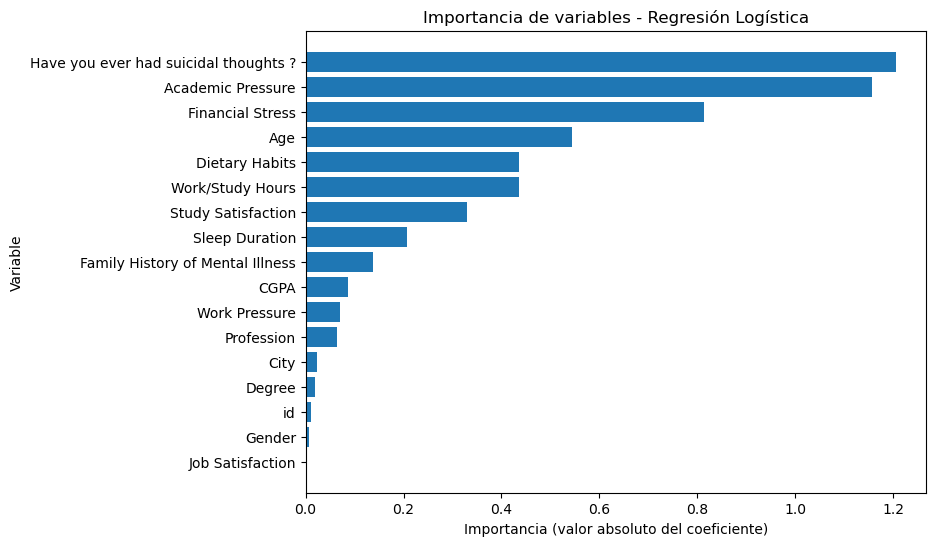

In [213]:
plt.figure(figsize=(8,6))
plt.barh(importancia['Variable'], importancia['Valor_Absoluto'])
plt.xlabel("Importancia (valor absoluto del coeficiente)")
plt.ylabel("Variable")
plt.title("Importancia de variables - Regresión Logística")
plt.gca().invert_yaxis()
plt.show()

Mejoras del modelo


In [215]:
grid_params= {
    'C':[0.01,0.1,1,10],
    'penalty': ["l1","l2"],
    'solver': ['liblinear','saga'],
    'class_weight':[None, "balanced"]
}

In [216]:
model_grid=GridSearchCV(estimator=model2,
                       param_grid=grid_params,
                        scoring='recall',
                        cv=5,
                        n_jobs=-1
                       )

In [217]:
model3=LogisticRegression(penalty='l1', solver='saga',C=0.01,max_iter=1000,class_weight=None)

In [218]:
model_grid.fit(X_train_Scaled,y_train)
print(model_grid.best_params_)
print(model_grid.best_score_)

{'C': 0.01, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
0.8904184275491474


In [219]:
# Modelo de Regresion logistica con Grid_search
model3.fit(X_train_Scaled,y_train)
y_pred2=model3.predict(X_test_Scaled)

In [220]:
saca_metricas(y_test,y_pred2)

Matriz de Confusión:
[[1832  481]
 [ 387 2881]]

Accuracy: 0.844472316789106
Precision: 0.844472316789106
Recall: 0.844472316789106
F1 Score: 0.844472316789106

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.84      0.84      0.84      5581



In [221]:
lista_final_LR= ["Have you ever had suicidal thoughts ?","Academic Pressure","Financial Stress","Age","CGPA","Work/Study Hours","Degree","Study Satisfaction","Dietary Habits","Sleep Duration","Profession"]

In [222]:
# Modelo de Regresion logistica con una reduccion de variables
model2.fit(X_train[lista_final_LR],y_train)

LogisticRegression(max_iter=1000)

In [223]:
y_pred=model2.predict(X_test[lista_final_LR])

In [224]:
saca_metricas(y_pred,y_test)

Matriz de Confusión:
[[1846  392]
 [ 467 2876]]

Accuracy: 0.846084931015947
Precision: 0.846084931015947
Recall: 0.846084931015947
F1 Score: 0.846084931015947

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2238
           1       0.88      0.86      0.87      3343

    accuracy                           0.85      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.85      0.85      0.85      5581



In [225]:
X_train_fe,X_test_fe, y_train_fe, y_test_fe= train_test_split(df_fe.drop('Depression', axis=1),
                                                  df_fe.Depression,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=df.Depression)

In [226]:
scaler=StandardScaler()
X_train_Scaled_fe=scaler.fit_transform(X_train_fe)
X_test_Scaled_fe=scaler.fit_transform(X_test_fe)

In [227]:
model4 =LogisticRegression(max_iter=1000)

In [228]:
# Modelo de Regresión logistica con la nueva variable
model4.fit(X_train_Scaled_fe,y_train_fe)
y_pred_fe=model4.predict(X_test_Scaled_fe)

In [229]:
saca_metricas(y_pred_fe,y_test_fe)

Matriz de Confusión:
[[1836  387]
 [ 477 2881]]

Accuracy: 0.8451890342232575
Precision: 0.8451890342232575
Recall: 0.8451890342232575
F1 Score: 0.8451890342232575

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      2223
           1       0.88      0.86      0.87      3358

    accuracy                           0.85      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.85      0.85      0.85      5581



In [230]:
# Modelo de Regresión logistica con la nueva variable y grid_search
model3.fit(X_train_Scaled_fe,y_train_fe)

LogisticRegression(C=0.01, max_iter=1000, penalty='l1', solver='saga')

In [231]:
y_pred3=model3.predict(X_test_Scaled_fe)

In [232]:
saca_metricas(y_pred3,y_test_fe)

Matriz de Confusión:
[[1832  387]
 [ 481 2881]]

Accuracy: 0.844472316789106
Precision: 0.844472316789106
Recall: 0.844472316789106
F1 Score: 0.844472316789106

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      2219
           1       0.88      0.86      0.87      3362

    accuracy                           0.84      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.85      0.84      0.84      5581



In [233]:
X_train_Scaled_df = pd.DataFrame(X_train_Scaled_fe, columns=X_train_fe.columns)
X_test_Scaled_df  = pd.DataFrame(X_test_Scaled_fe,  columns=X_test_fe.columns)

In [234]:
# Modelo de Regresión logística con reduccion de variables y la nueva variable
model2.fit(X_train_Scaled_df[lista_final_LR],y_train_fe)

LogisticRegression(max_iter=1000)

In [235]:
y_pred4=model2.predict(X_test_Scaled_df[lista_final_LR])

In [236]:
saca_metricas(y_pred4,y_test_fe)

Matriz de Confusión:
[[1843  389]
 [ 470 2879]]

Accuracy: 0.846084931015947
Precision: 0.846084931015947
Recall: 0.846084931015947
F1 Score: 0.846084931015947

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      2232
           1       0.88      0.86      0.87      3349

    accuracy                           0.85      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.85      0.85      0.85      5581



In [237]:
model=RandomForestClassifier(random_state=42)

In [238]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [239]:
saca_metricas(y_test,y_pred)

Matriz de Confusión:
[[1811  502]
 [ 399 2869]]

Accuracy: 0.8385593979573553
Precision: 0.8385593979573553
Recall: 0.8385593979573553
F1 Score: 0.8385593979573553

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2313
           1       0.85      0.88      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



In [240]:
grid_param={
    'n_estimators':[50,200],
    'max_depth': [22,24]
}

In [241]:
model_grid2=GridSearchCV(estimator=model,
                       param_grid=grid_param,
                        scoring='recall',
                        cv=5,
                        n_jobs=-1)

In [242]:
model_grid2.fit(X_train,y_train)
print(model_grid2.best_params_)
print(model_grid2.best_score_)

{'max_depth': 24, 'n_estimators': 200}
0.8815417644284024


In [243]:
model4=RandomForestClassifier(n_estimators= 200, max_depth=24, random_state=42)

In [244]:
# Modelo de Random Forest con Grid_search
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)

In [245]:
saca_metricas(y_test,y_pred4)

Matriz de Confusión:
[[1817  496]
 [ 395 2873]]

Accuracy: 0.8403511915427343
Precision: 0.8403511915427343
Recall: 0.8403511915427343
F1 Score: 0.8403511915427343

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2313
           1       0.85      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



In [246]:
def plot_feature_importance(model, X_train):
    feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
    feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
    
    fig = px.bar(feat_importances, x=feat_importances.index, y='Importance', title='Feature Importances', labels={'x': 'Features', 'Importance': 'Importance'}, template='plotly_white')
    fig.show()

    return feat_importances

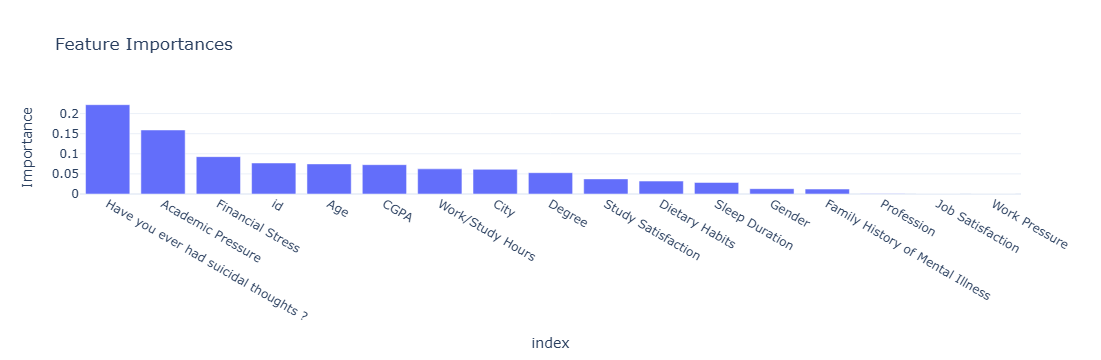

In [247]:
feature_importances = plot_feature_importance(model, X_train)

In [248]:
lista_final=["Have you ever had suicidal thoughts ?","Academic Pressure","Financial Stress","id","Age","CGPA","Work/Study Hours","City","Degree","Study Satisfaction","Dietary Habits","Sleep Duration"]

In [249]:
# Modelo de Random Forest con reducción de variables
model.fit(X_train[lista_final],y_train)

RandomForestClassifier(random_state=42)

In [250]:
y_pred5=model.predict(X_test[lista_final])

In [251]:
saca_metricas(y_test,y_pred5)

Matriz de Confusión:
[[1805  508]
 [ 395 2873]]

Accuracy: 0.8382010392402796
Precision: 0.8382010392402796
Recall: 0.8382010392402796
F1 Score: 0.8382010392402796

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2313
           1       0.85      0.88      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



In [252]:
# Modelo de Random Forest con la nueva variable
model.fit(X_train_fe,y_train_fe)
y_pred_fe=model.predict(X_test_fe)

In [253]:
saca_metricas(y_pred_fe,y_test_fe)

Matriz de Confusión:
[[1810  393]
 [ 503 2875]]

Accuracy: 0.8394552947500448
Precision: 0.8394552947500448
Recall: 0.8394552947500448
F1 Score: 0.8394552947500448

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      2203
           1       0.88      0.85      0.87      3378

    accuracy                           0.84      5581
   macro avg       0.83      0.84      0.83      5581
weighted avg       0.84      0.84      0.84      5581



Despues de todos estos resultados podemos observar que el mejor modelo, es el modelo de regresión logistica
